In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
# Carga de los archivos

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [156]:
# combnar

df = pd.concat([train_data, test_data], keys=["train", "test"], axis=0)

In [157]:
# variables 

selected_features = [ "OverallQual", "GrLivArea", "Neighborhood", "YearBuilt", "GarageCars", "TotalBsmtSF", "KitchenQual",  "FullBath", "MSZoning" , "LotArea", "SalePrice"]

In [158]:
df_backup = df.copy()

In [159]:
df = df[selected_features]

In [160]:
# compruebo datos nulos y su numero

df.isna().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
SalePrice       1459
dtype: int64

In [161]:
#hago una mascara
saleprice_na_value = df.SalePrice.isna()
df[saleprice_na_value]

OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
test 0               5        896        NAmes       1961         1.0   
     1               6       1329        NAmes       1958         1.0   
     2               5       1629      Gilbert       1997         2.0   
     3               6       1604      Gilbert       1998         2.0   
     4               8       1280      StoneBr       1992         2.0   
...                ...        ...          ...        ...         ...   
     1454            4       1092      MeadowV       1970         0.0   
     1455            4       1092      MeadowV       1970         1.0   
     1456            5       1224      Mitchel       1960         2.0   
     1457            5        970      Mitchel       1992         0.0   
     1458            7       2000      Mitchel       1993         3.0   

           TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  SalePrice  
test 0           882.0          TA         1       RH    11622        NaN  
     1          1329.0          Gd         1       RL    14267        NaN  
     2           928.0          TA         2       RL    13830        NaN  
     3           926.0          Gd         2       RL     9978        NaN  
     4          1280.0          Gd         2       RL     5005        NaN  
...                ...         ...       ...      ...      ...        ...  
     1454        546.0          TA         1       RM     1936        NaN  
     1455        546.0          TA         1       RM     1894        NaN  
     1456       1224.0          TA         1       RL    20000        NaN  
     1457        912.0          TA         1       RL    10441        NaN  
     1458        996.0          TA         2       RL     9627        NaN  

[1459 rows x 11 columns]

In [162]:
#los valores de venta SalePrice hay que encontrarlos

In [163]:
#variables cuantitativas

df.describe().round(3)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,SalePrice
count,2919.000,2919.000,2919.000,2918.000,2918.000,2919.000,2919.000,1460.000
mean,6.089,1500.760,1971.313,1.767,1051.778,1.568,10168.114,180921.196
std,1.410,506.051,30.291,0.762,440.766,0.553,7886.996,79442.503
min,1.000,334.000,1872.000,0.000,0.000,0.000,1300.000,34900.000
25%,5.000,1126.000,1953.500,1.000,793.000,1.000,7478.000,129975.000
50%,6.000,1444.000,1973.000,2.000,989.500,2.000,9453.000,163000.000
75%,7.000,1743.500,2001.000,2.000,1302.000,2.000,11570.000,214000.000
max,10.000,5642.000,2010.000,5.000,6110.000,4.000,215245.000,755000.000


In [164]:
#variables culitativas

df.select_dtypes('object').describe()

,Neighborhood,KitchenQual,MSZoning
count,2919,2918,2915
unique,25,4,5
top,NAmes,TA,RL
freq,443,1492,2265


In [165]:
df.dtypes

OverallQual       int64
GrLivArea         int64
Neighborhood     object
YearBuilt         int64
GarageCars      float64
TotalBsmtSF     float64
KitchenQual      object
FullBath          int64
MSZoning         object
LotArea           int64
SalePrice       float64
dtype: object

In [166]:
cualitative_var = df.select_dtypes('object').columns
cualitative_var

Index(['Neighborhood', 'KitchenQual', 'MSZoning'], dtype='object')

In [167]:
cuantitative_var = df.select_dtypes('number').columns
cuantitative_var

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'LotArea', 'SalePrice'],
      dtype='object')

In [168]:
df[cualitative_var].isna().sum()

Neighborhood    0
KitchenQual     1
MSZoning        4
dtype: int64

In [169]:
# imputar kitchenqual

df.KitchenQual.mode()[0]

'TA'

In [170]:
df.KitchenQual = df.KitchenQual.fillna(df.KitchenQual.mode()[0])


In [171]:
# imputar lmszoning

df.MSZoning.mode()[0]

'RL'

In [172]:
df.MSZoning = df.MSZoning.fillna(df.MSZoning.mode()[0])

In [173]:
# Variables cuantitativas

cuantitative_var = df.select_dtypes('number').columns
cuantitative_var

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'LotArea', 'SalePrice'],
      dtype='object')

In [174]:
df[cuantitative_var].isna().sum()

OverallQual       0
GrLivArea         0
YearBuilt         0
GarageCars        1
TotalBsmtSF       1
FullBath          0
LotArea           0
SalePrice      1459
dtype: int64

In [175]:
# Garage cars

df.GarageCars = df.GarageCars.fillna(df.GarageCars.mode()[0])
df.GarageCars

train  0       2.0
       1       2.0
       2       2.0
       3       3.0
       4       3.0
              ... 
test   1454    0.0
       1455    1.0
       1456    2.0
       1457    0.0
       1458    3.0
Name: GarageCars, Length: 2919, dtype: float64

In [176]:
#TotalBsmtSF

df.TotalBsmtSF = df.TotalBsmtSF.fillna(df.TotalBsmtSF.mean() )

df.TotalBsmtSF

train  0        856.0
       1       1262.0
       2        920.0
       3        756.0
       4       1145.0
                ...  
test   1454     546.0
       1455     546.0
       1456    1224.0
       1457     912.0
       1458     996.0
Name: TotalBsmtSF, Length: 2919, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

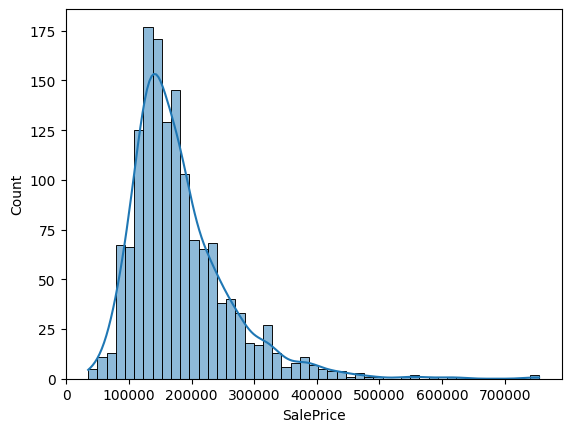

In [177]:
# SalePrice

ifg, ax = plt.subplots()
sns.histplot(df.SalePrice, kde=True, ax=ax)

In [178]:
#correlacion variables num

correlation = df[cuantitative_var].corr().round(2)
correlation

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,SalePrice
OverallQual,1.00,0.58,0.60,0.60,0.55,0.53,0.10,0.79
GrLivArea,0.58,1.00,0.24,0.49,0.45,0.63,0.28,0.71
YearBuilt,0.60,0.24,1.00,0.54,0.41,0.47,0.02,0.52
GarageCars,0.60,0.49,0.54,1.00,0.44,0.48,0.18,0.64
TotalBsmtSF,0.55,0.45,0.41,0.44,1.00,0.33,0.25,0.61
FullBath,0.53,0.63,0.47,0.48,0.33,1.00,0.13,0.56
LotArea,0.10,0.28,0.02,0.18,0.25,0.13,1.00,0.26
SalePrice,0.79,0.71,0.52,0.64,0.61,0.56,0.26,1.00


<Axes: >

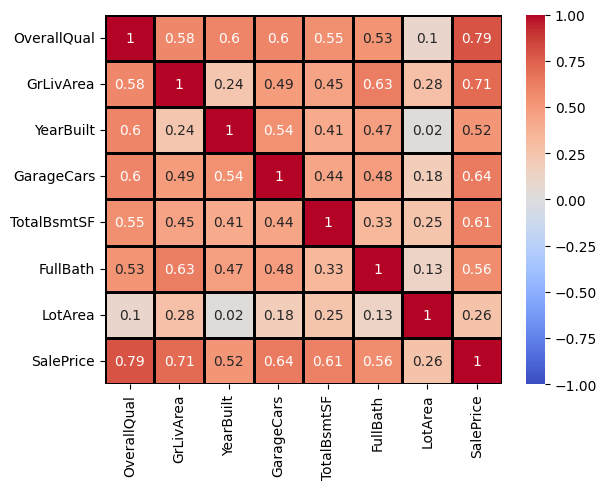

In [179]:
#grafica coeficiente relacion num hatmap

fig, ax = plt.subplots()
sns.heatmap(correlation, annot=True, ax=ax,
vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=1, linecolor='black')

In [180]:
#ppreprocesamiento datos
# x dataset v independ feature
# y dataset v dependiendtes target
# elijo todas menos la ultima 

X = df.iloc[:, :-1]
X
Y = df.SalePrice
Y

train  0       208500.0
       1       181500.0
       2       223500.0
       3       140000.0
       4       250000.0
                 ...   
test   1454         NaN
       1455         NaN
       1456         NaN
       1457         NaN
       1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [181]:
#tratar var num cuantitavia standarizacion



cuantitative_var_X = cuantitative_var[:-1]
cuantitative_var
cualitative_var_X = cualitative_var
cualitative_var


Index(['Neighborhood', 'KitchenQual', 'MSZoning'], dtype='object')

In [182]:
X[cuantitative_var_X].describe().round(2)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,6.09,1500.76,1971.31,1.77,1051.78,1.57,10168.11
std,1.41,506.05,30.29,0.76,440.69,0.55,7887.00
min,1.00,334.00,1872.00,0.00,0.00,0.00,1300.00
25%,5.00,1126.00,1953.50,1.00,793.00,1.00,7478.00
50%,6.00,1444.00,1973.00,2.00,990.00,2.00,9453.00
75%,7.00,1743.50,2001.00,2.00,1302.00,2.00,11570.00
max,10.00,5642.00,2010.00,5.00,6110.00,4.00,215245.00


In [183]:
#importar standar scaler e instanciar

from sklearn.preprocessing import StandardScaler

In [184]:
sd_scaler = StandardScaler() 

In [185]:
for col in cuantitative_var_X:
    X[col] = sd_scaler.fit_transform(X[col].to_frame())

In [186]:
#comprabacion var num

X[cuantitative_var_X].describe().round(2)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.61,-2.31,-3.28,-2.32,-2.39,-2.84,-1.12
25%,-0.77,-0.74,-0.59,-1.01,-0.59,-1.03,-0.34
50%,-0.06,-0.11,0.06,0.31,-0.14,0.78,-0.09
75%,0.65,0.48,0.98,0.31,0.57,0.78,0.18
max,2.77,8.18,1.28,4.25,11.48,4.40,26.01


In [187]:
#standarizar var cualitativas codificar imporat label encoder asiganmos un valor numerico a cada uno
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()



In [188]:
for col in cualitative_var_X:
    X[col] = encoder.fit_transform(X[col]) 
    

In [189]:
X[cualitative_var_X]

Neighborhood  KitchenQual  MSZoning
train 0                5            2         3
      1               24            3         3
      2                5            2         3
      3                6            2         3
      4               15            2         3
...                  ...          ...       ...
test  1454            10            3         4
      1455            10            3         4
      1456            11            3         3
      1457            11            3         3
      1458            11            3         3

[2919 rows x 3 columns]

In [190]:
#dividir dataset en train y test features y target entrenamiento modelo
training_data_X = X.loc["train"]
training_data_Y = Y.loc["train"]

training_data_X
training_data_Y

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(training_data_X, training_data_Y, test_size=0.2, random_state=0)



In [191]:
from sklearn.linear_model import LinearRegression
#instanciamos linear regression
linear_regression = LinearRegression()

In [192]:
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [193]:
#Predecimos valores
Y_pred = linear_regression.predict(X_test)
Y_pred

array([259540.64926842, 179023.65462095, 124108.06552589, 216746.58852147,
       115520.58739564,  97308.95563262, 255719.5138269 , 149155.08576012,
       503526.58945588, 169521.99630436, 210797.69866887, 186041.18139092,
       232358.74492606, 105428.86567786, 134747.02533019, 140605.74679307,
       219425.29485113,  96416.1453286 , 152306.97526524, 213460.83722705,
       132550.4101629 , 153251.92504297, 108420.12450946, 160576.86204099,
       198886.21376075, 204772.89012648, 183323.23693926,  51699.99810654,
       318470.3657361 , 115256.72341525, 192558.73906961, 211362.9721574 ,
       137403.69381905, 280795.63673397, 305257.9073812 , 185711.23560296,
       291511.16250505, 116807.91461384, 239520.85606353, 300503.2285648 ,
       217717.50510967, 121000.79108962, 206601.17397548, 283795.6254587 ,
       353682.80511602, 174047.21593065, 107429.2531414 , 110222.34847983,
       177283.91951027,  71011.25516489, 368221.98327835, 134305.69603208,
       170466.88823607,  

In [194]:
#evaluamos mean squared error y r2 scoref
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)

r2_score = r2_score(Y_test, Y_pred)


In [195]:
print(f"Mean Squared Error: {mse} r2_score: {r2_score}")

Mean Squared Error: 2259433177.827554 r2_score: 0.6728233034883833


In [198]:
#resultados para kagle 

X_test_kaggle = X.loc["test"]
X_test_kaggle

,OverallQual,GrLivArea,Neighborhood,YearBuilt,GarageCars,TotalBsmtSF,KitchenQual,FullBath,MSZoning,LotArea
0,-0.772552,-1.195262,12,-0.340510,-1.006994,-0.385319,3,-1.027363,2,0.184371
1,-0.063185,-0.339470,12,-0.439565,-1.006994,0.629171,2,-1.027363,3,0.519791
2,-0.772552,0.253457,8,0.848148,0.306418,-0.280920,3,0.781366,3,0.464374
3,-0.063185,0.204046,8,0.881166,0.306418,-0.285459,2,0.781366,3,-0.024109
4,1.355551,-0.436315,22,0.683057,0.306418,0.517963,2,0.781366,3,-0.654748
...,...,...,...,...,...,...,...,...,...,...
1454,-1.481920,-0.807883,10,-0.043346,-2.320407,-1.147889,3,-1.027363,4,-1.043937
1455,-1.481920,-0.807883,10,-0.043346,-1.006994,-1.147889,3,-1.027363,4,-1.049263
1456,-0.772552,-0.546995,11,-0.373528,0.306418,0.390868,3,-1.027363,3,1.246808
1457,-0.772552,-1.049006,11,0.683057,-2.320407,-0.317233,3,-1.027363,3,0.034605


In [199]:
#obtener predicciones
predicted_prices = linear_regression.predict(X_test_kaggle)
predicted_prices

array([106783.3309409 , 177310.75977952, 165730.81108556, ...,
       152719.01364616, 110318.75939676, 227511.88480136])

In [207]:
#unno valores a las predciiones
id_values = test_data.Id
id_values.sample(2)

311    1772
431    1892
Name: Id, dtype: int64

In [209]:
kaagle_submission = pd.DataFrame({'Id' : id_values, 'SalePrice' : predicted_prices})
kaagle_submission

,Id,SalePrice
0,1461,106783.330941
1,1462,177310.759780
2,1463,165730.811086
3,1464,192828.838345
4,1465,215046.569697
...,...,...
1454,2915,74476.623408
1455,2916,85587.804795
1456,2917,152719.013646
1457,2918,110318.759397


In [210]:
#csv
kaagle_submission.to_csv('./data/kaagle_submission.csv', index=False)